<a href="https://colab.research.google.com/github/Lucas-Siade/Data-Science/blob/main/Codes/Supervisionado/DS%20-%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exemplo**

## **Bibliotecas**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## **Dataset**

In [43]:
datasetLSTM = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Dataset - Temperatura.csv")

display(datasetLSTM.head())

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


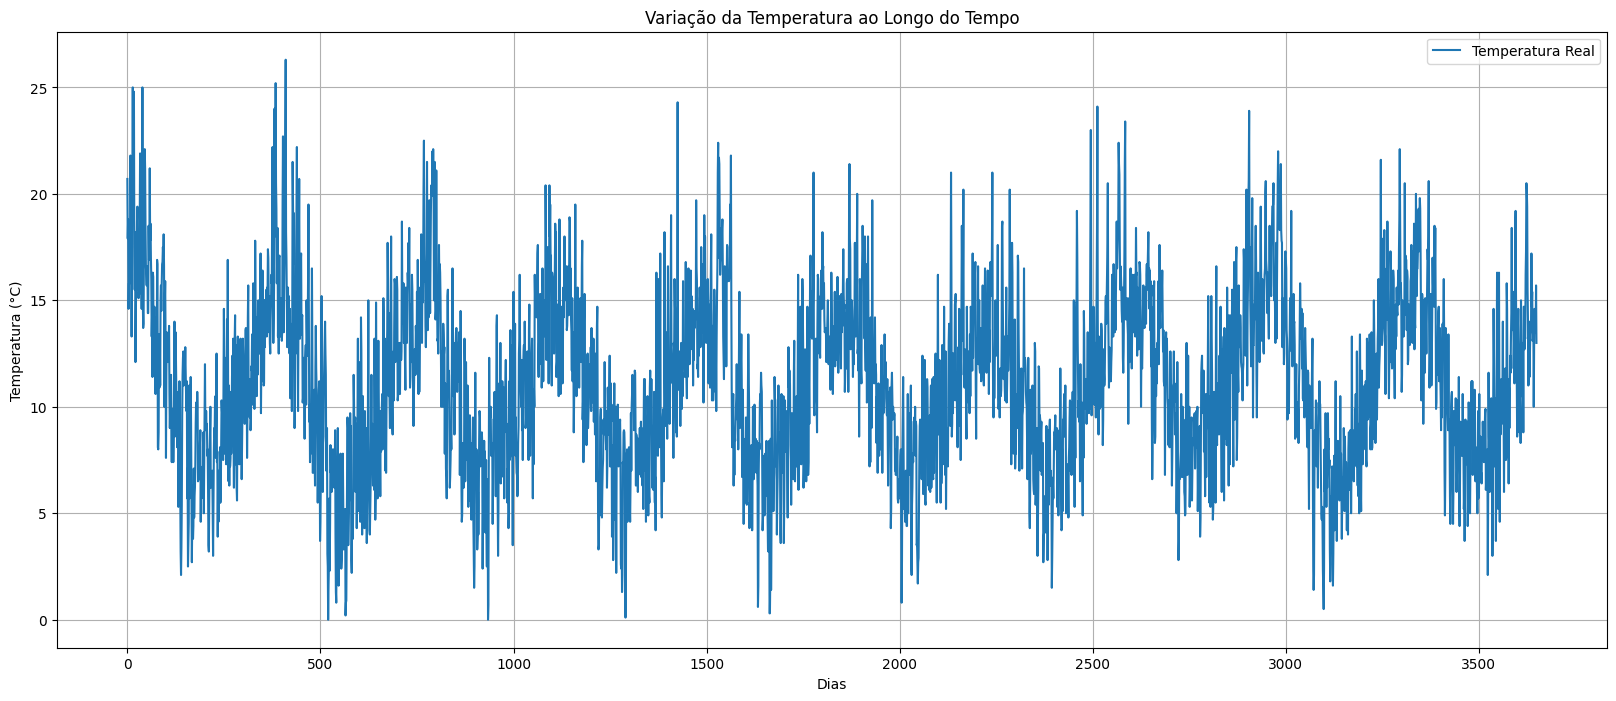

In [52]:
plt.figure(figsize=(20, 8))
plt.plot(datasetLSTM["Temp"], label='Temperatura Real')
plt.xlabel("Dias")
plt.ylabel("Temperatura (°C)")
plt.title("Variação da Temperatura ao Longo do Tempo")
plt.legend()
plt.grid(True)
plt.show()

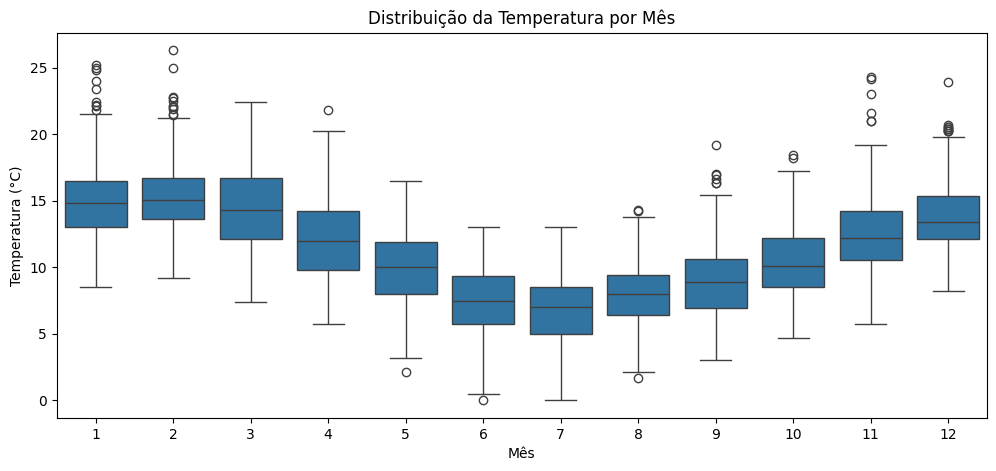

In [45]:
datasetLSTM["Ano"] = pd.to_datetime(datasetLSTM["Date"]).dt.year
datasetLSTM["Mes"] = pd.to_datetime(datasetLSTM["Date"]).dt.month

plt.figure(figsize=(12, 5))
sns.boxplot(x="Mes", y="Temp", data=datasetLSTM)
plt.title("Distribuição da Temperatura por Mês")
plt.xlabel("Mês")
plt.ylabel("Temperatura (°C)")
plt.show()

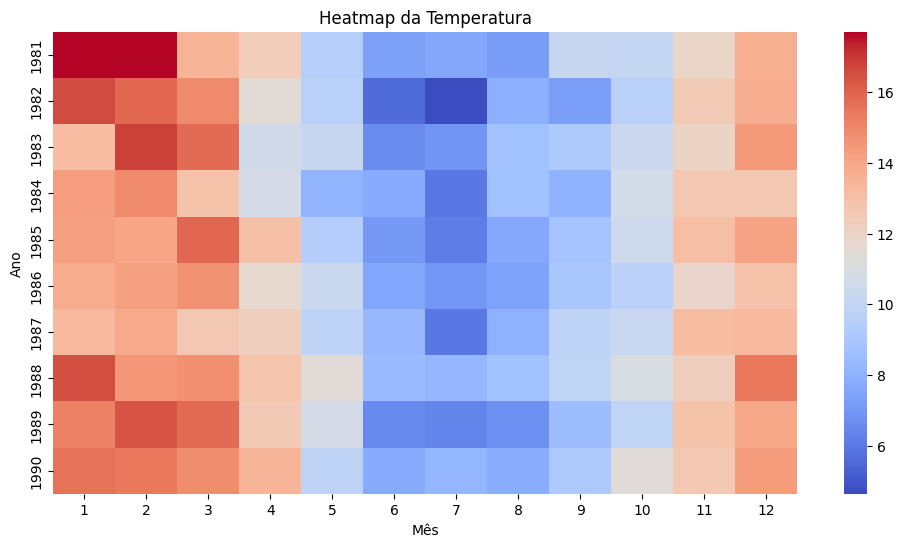

In [46]:
heatmap = datasetLSTM.pivot_table(values="Temp", index="Ano", columns="Mes")

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap, cmap="coolwarm", annot=False)
plt.title("Heatmap da Temperatura")
plt.xlabel("Mês")
plt.ylabel("Ano")
plt.show()

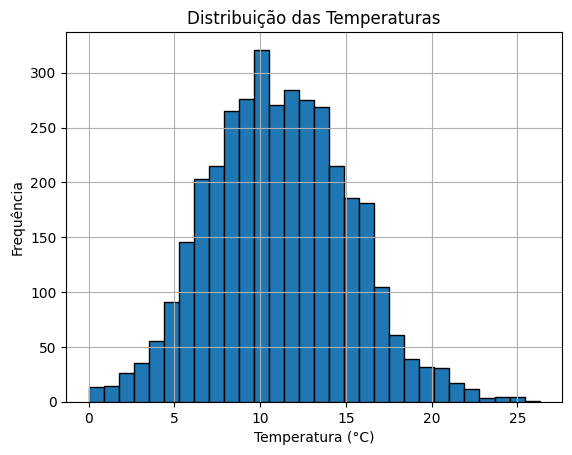

In [47]:
plt.hist(datasetLSTM["Temp"], bins=30, edgecolor='black')
plt.title("Distribuição das Temperaturas")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

## **Modelo**

In [48]:
#DEFINIR VARIÁVEIS
def criarSequencias(dados, janela):
    X, y = [], []
    for i in range(len(dados) - janela):
        X.append(dados[i:i+janela])
        y.append(dados[i+janela])
    return np.array(X), np.array(y)

#NORMALIZAR OS DADOS
YLSTM = datasetLSTM["Temp"].values.reshape(-1, 1)
scaler = MinMaxScaler()
YLSTM_scaled = scaler.fit_transform(YLSTM)

#CRIAR SEQUÊNCIAS TEMPORAIS
XLSTM, YLSTM = criarSequencias(YLSTM_scaled, 7)

#DIVISÃO EM TREINO E TESTE
XLSTM_treino, XLSTM_teste, YLSTM_treino, YLSTM_teste = train_test_split(XLSTM, YLSTM, test_size=0.2, random_state=42, shuffle=False)

#TREINO DO MODELO
modelLSTM = Sequential()
modelLSTM.add(LSTM(50, activation='relu', input_shape=(7, 1)))
modelLSTM.add(Dense(1))
modelLSTM.compile(optimizer='adam', loss='mse')
modelLSTM.fit(XLSTM_treino, YLSTM_treino, epochs=20, validation_data=(XLSTM_teste, YLSTM_teste), verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1033 - val_loss: 0.0114
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0120 - val_loss: 0.0104
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - val_loss: 0.0096
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0114 - val_loss: 0.0098
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - val_loss: 0.0095
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0114 - val_loss: 0.0090
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0102 - val_loss: 0.0090
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0101 - val_loss: 0.0084
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - val_loss: 0.0088
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - val_loss: 0.0085
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0106 - val_loss: 0.0077
Epoch 12/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0099 - val_loss: 0.007

## **Extra**

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


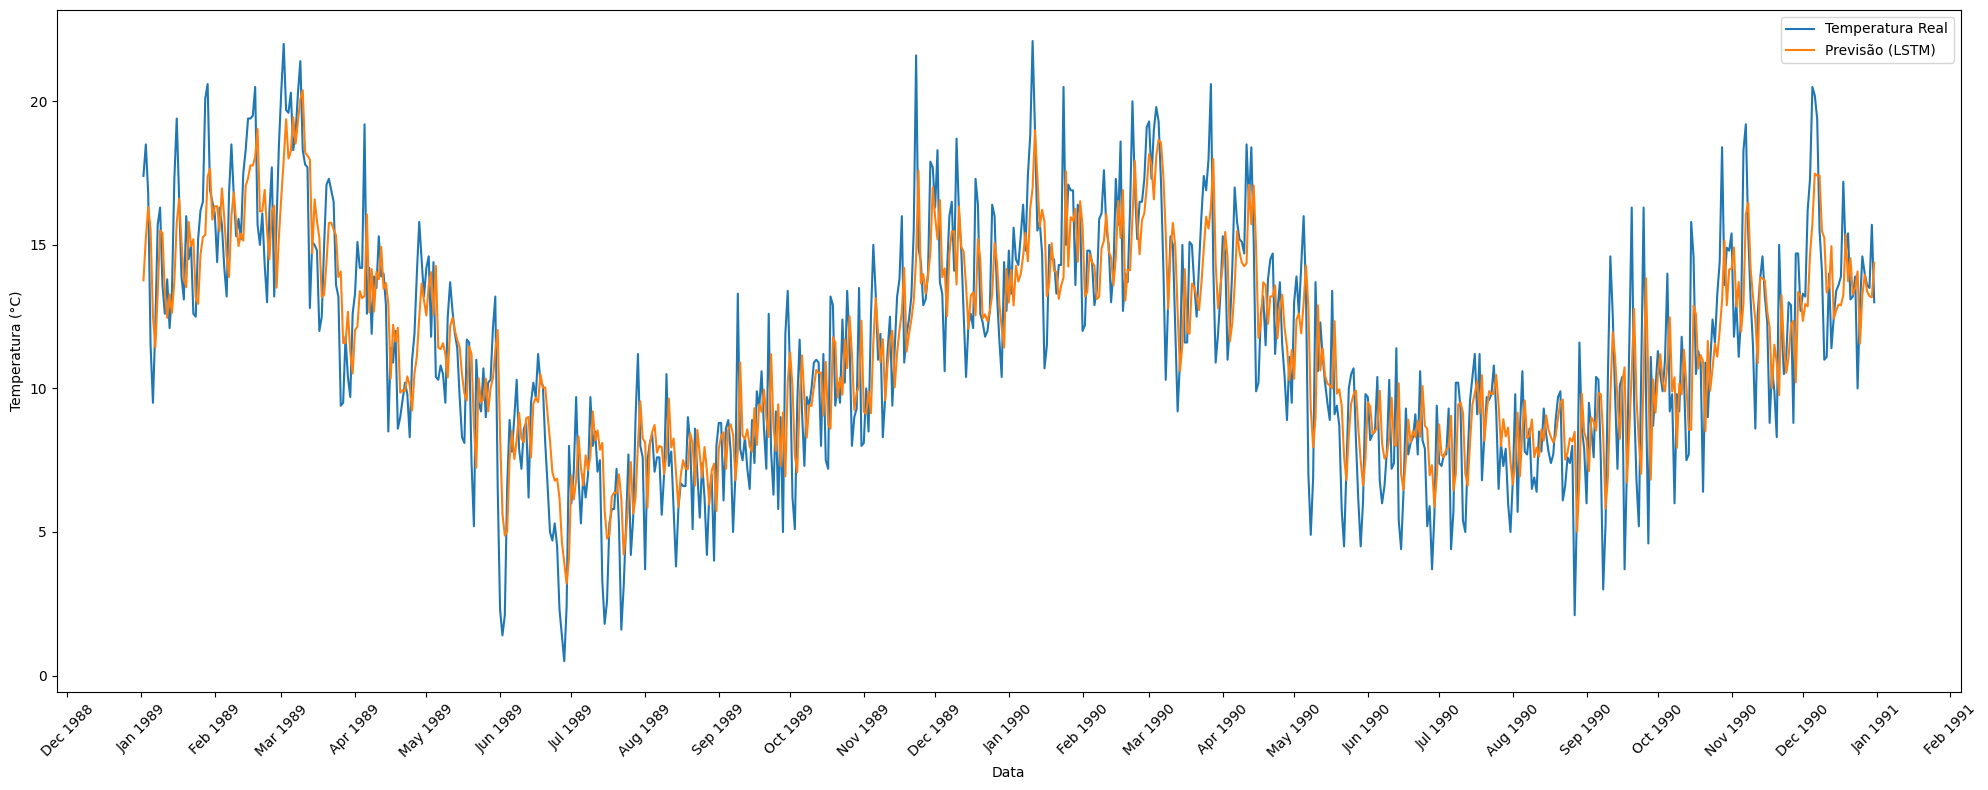

In [49]:
import matplotlib.dates as mdates

#ARRUMAR OS DADOS
YLSTM_Pred = modelLSTM.predict(XLSTM_teste)
YLSTM_Pred_rescaled = scaler.inverse_transform(YLSTM_Pred)
YLSTM_teste_rescaled = scaler.inverse_transform(YLSTM_teste)

datasetLSTM["Date"] = pd.to_datetime(datasetLSTM["Date"])
datas_teste = datasetLSTM["Date"].values[-len(YLSTM_teste):]

# VISUALIZAÇÃO
plt.figure(figsize=(20, 8))
plt.plot(datas_teste, YLSTM_teste_rescaled, label='Temperatura Real')
plt.plot(datas_teste, YLSTM_Pred_rescaled, label='Previsão (LSTM)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

plt.xlabel("Data")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
#MÉTRICAS DE AVALIAÇÃO
mae = mean_absolute_error(YLSTM_teste, YLSTM_Pred)
mse = mean_squared_error(YLSTM_teste, YLSTM_Pred)
rmse = np.sqrt(mse)
r2 = r2_score(YLSTM_teste, YLSTM_Pred)

print("\n📊 Avaliação do Modelo de Regressão Linear")
print("-" * 50)
print(f"✔️  MAE  (Erro Absoluto Médio): {mae:.2f}")
print(f"✔️  RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")
print(f"✔️  R²   (Coeficiente de Determinação): {r2:.2%}")
print("-" * 50)


📊 Avaliação do Modelo de Regressão Linear
--------------------------------------------------
✔️  MAE  (Erro Absoluto Médio): 0.07
✔️  RMSE (Raiz do Erro Quadrático Médio): 0.09
✔️  R²   (Coeficiente de Determinação): 70.00%
--------------------------------------------------
